<a href="https://colab.research.google.com/github/salllwaaa/Conect-_x/blob/main/3rdassessment(conectX).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import graphviz
# import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# **Reading Data**

In [ ]:
data=pd.read_csv('/content/bank-additional-full.csv.csv')

# **Data Exploring(Visualization)**

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,no


In [ ]:
data.shape

(41188, 11)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0


**The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.**

Number of Instances: 41188

Number of Attributes: 10 + output attribute.

**The classification goal is to predict if the client will subscribe a term deposit (variable y).**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  y            41188 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.5+ MB


As we see most of the data are objects

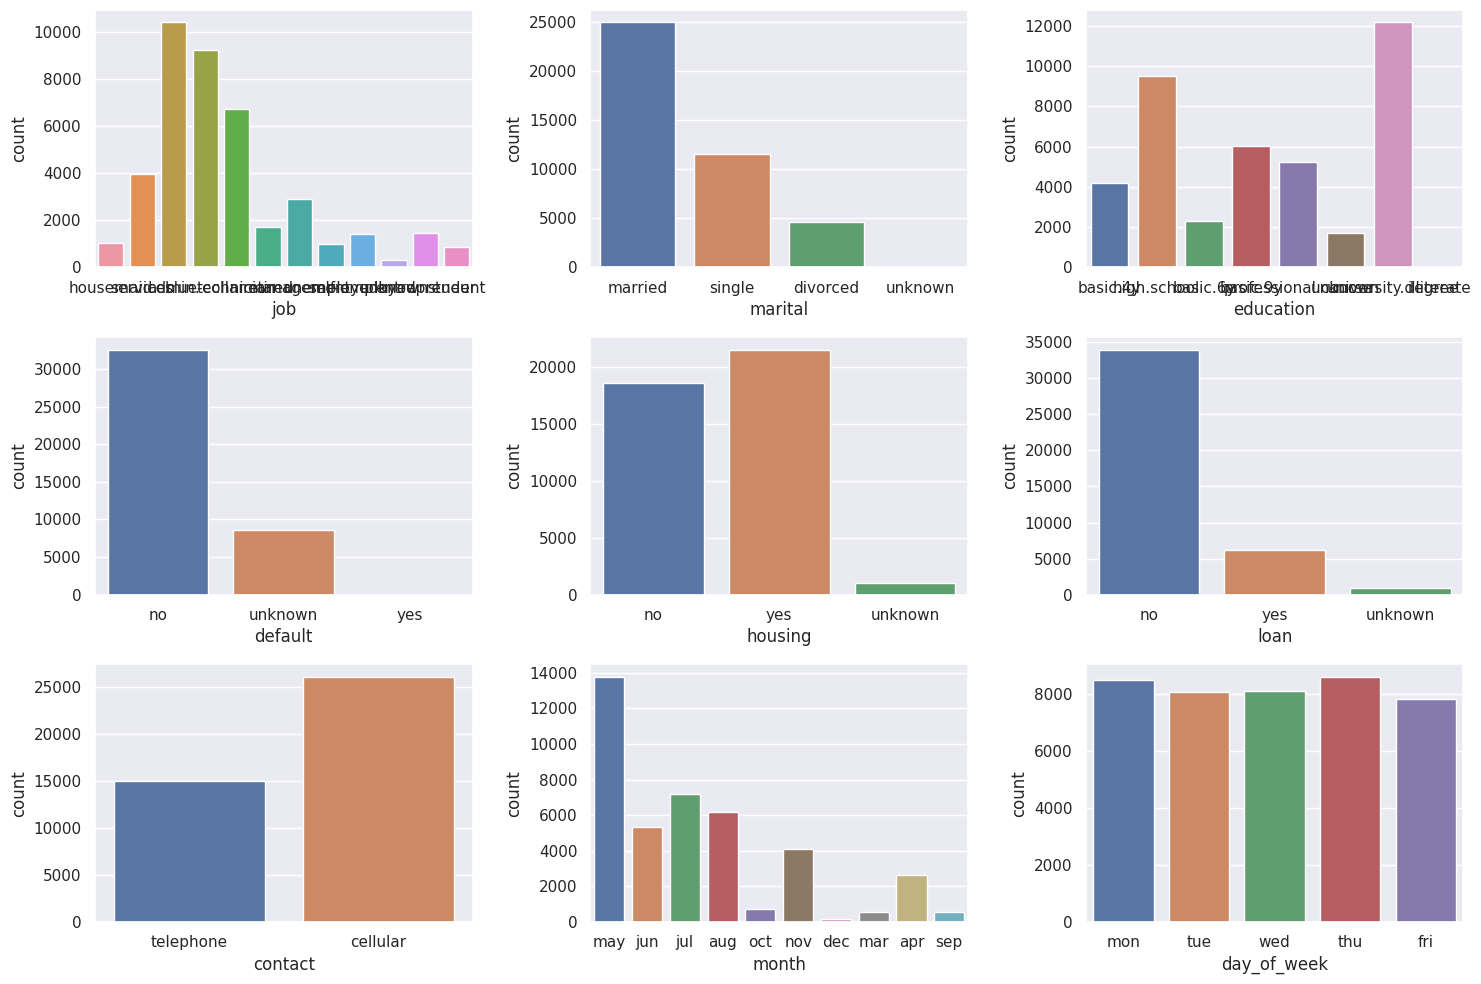

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.countplot(x='job', data=data)

plt.subplot(3, 3, 2)
sns.countplot(x='marital', data=data)

plt.subplot(3, 3, 3)
sns.countplot(x='education', data=data)

plt.subplot(3, 3, 4)
sns.countplot(x='default', data=data)

plt.subplot(3, 3, 5)
sns.countplot(x='housing', data=data)

plt.subplot(3, 3, 6)
sns.countplot(x='loan', data=data)

plt.subplot(3, 3, 7)
sns.countplot(x='contact', data=data)

plt.subplot(3, 3, 8)
sns.countplot(x='month', data=data)

plt.subplot(3, 3, 9)
sns.countplot(x='day_of_week', data=data)

plt.tight_layout()
plt.show()


1..A histogram of the 'age' column to show the distribution of ages.

2..Box plots for the 'age' variable across different levels of 'education,' 'loan,' and 'housing' to visualize the distribution and identify potential outliers.

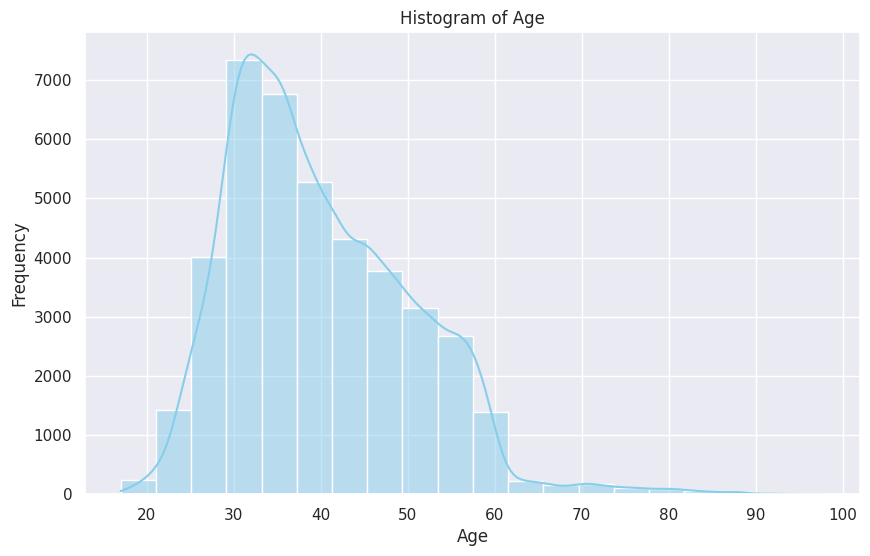

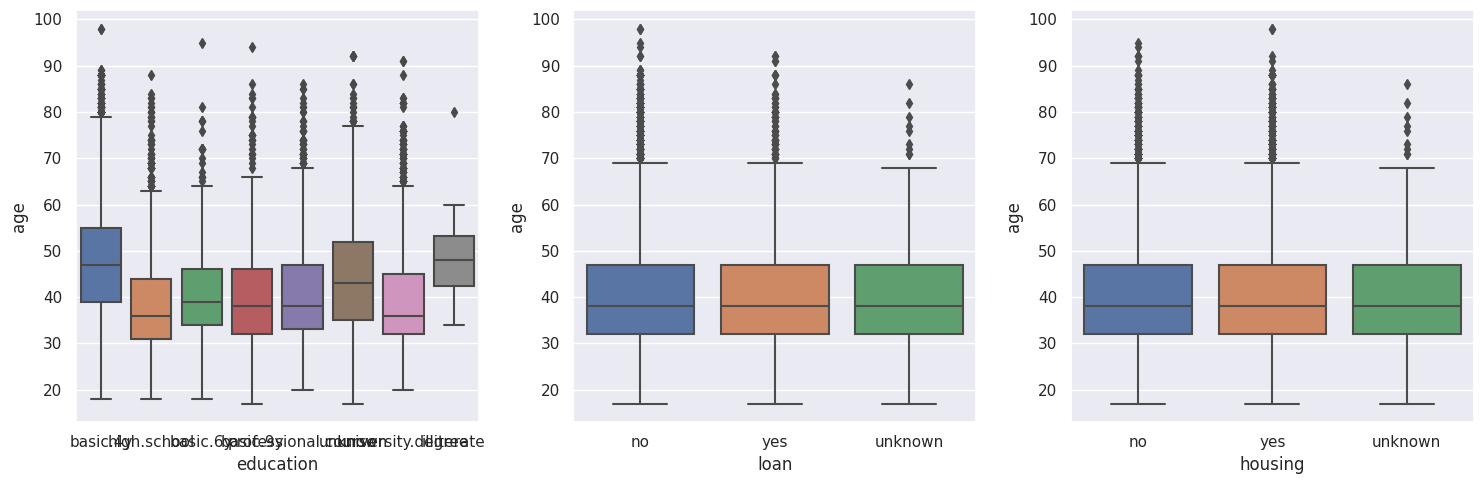

In [ ]:
# Histogram for the 'age' column
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plots for numerical variables
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='education', y='age', data=data)

plt.subplot(1, 3, 2)
sns.boxplot(x='loan', y='age', data=data)

plt.subplot(1, 3, 3)
sns.boxplot(x='housing', y='age', data=data)

plt.tight_layout()
plt.show()



**Bar Plot for Target Variable 'y'**

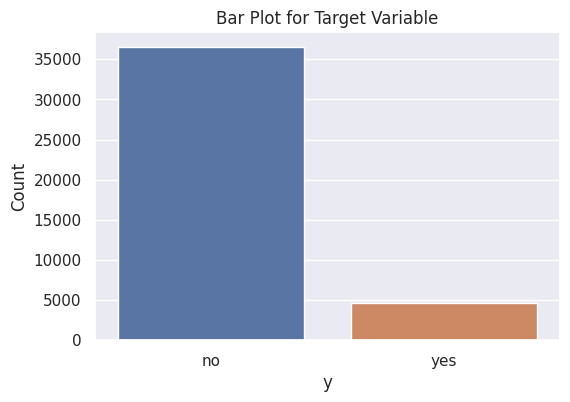

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=data)
plt.title('Bar Plot for Target Variable')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

**Bar Plot for 'month' and 'y'**

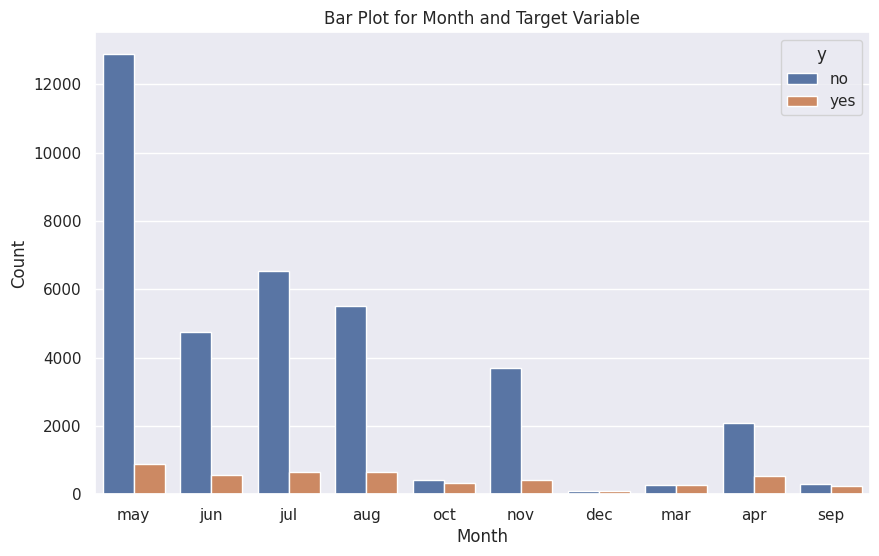

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='y', data=data)
plt.title('Bar Plot for Month and Target Variable')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

**Pie Chart for 'marital' distribution**

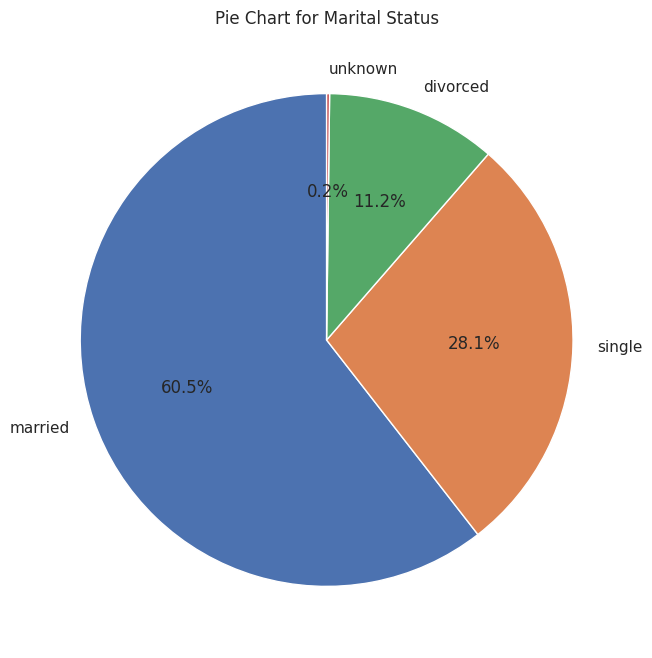

In [ ]:
plt.figure(figsize=(8, 8))
data['marital'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for Marital Status')
plt.ylabel('')
plt.show()

<ipython-input-12-2cf2003998cb>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax = ax[1], kde= False)


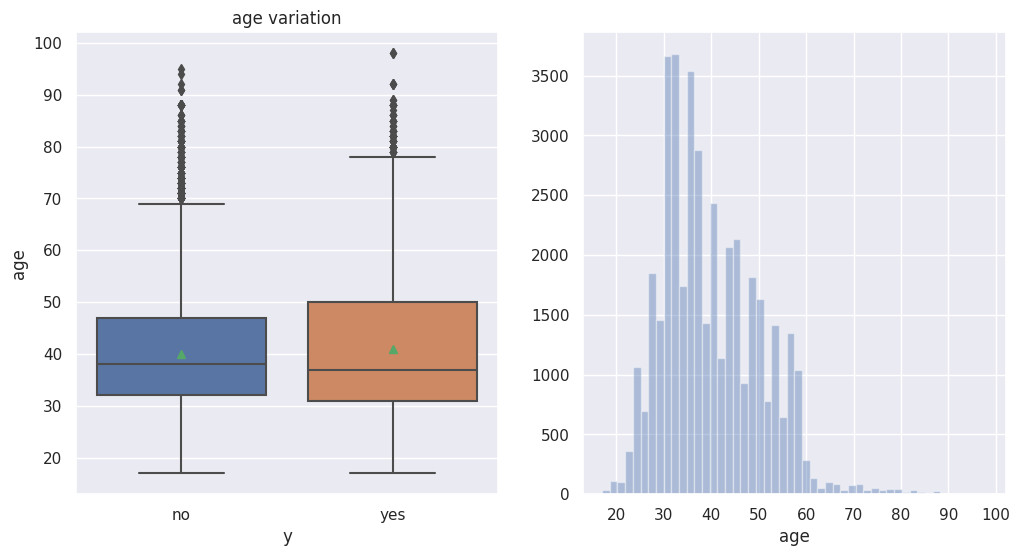

In [ ]:
int_feature_list = list(data.dtypes[data.dtypes != 'object'].index)

for feature in int_feature_list:

    fig, ax = plt.subplots(1,2, figsize= (12,6))
    sns.boxplot(x='y', y=feature, data =data, showmeans=True, ax = ax[0])
    sns.distplot(data[feature], ax = ax[1], kde= False)
    ax[0].set_title('{} variation'.format(feature))
    plt.show()

#**Data Preprocessing**

In [ ]:
data['y'] = data.y.apply(lambda x:0 if x=='no' else 1)
display(data.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,0


**Check Nulls**

In [ ]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
y              0
dtype: int64

In [ ]:
data.duplicated().sum()

7061

** view some of the duplicated rows**

In [ ]:
duplicates = data[data.duplicated()]
display(duplicates.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,0
11,25,services,single,high.school,no,yes,no,telephone,may,mon,0
16,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,0
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,0
86,41,management,married,basic.6y,no,no,no,telephone,may,mon,0


**Drop duplicates**

In [ ]:
data_no_duplicates = data.drop_duplicates()

**Check how many unique value in each column**



In [ ]:
data.nunique()

age            78
job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
y               2
dtype: int64

Perform one-hot encoding on the 'job' and 'month' column


> Indented block



In [ ]:
columns_to_encode = ['job', 'month']

# Perform one-hot encoding on the specified columns
data_encoded = pd.get_dummies(data, columns=columns_to_encode, prefix=columns_to_encode)

display(data_encoded.head())

,age,marital,education,default,housing,loan,contact,day_of_week,y,job_admin.,...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,married,basic.4y,no,no,no,telephone,mon,0,0,...,0,0,0,0,0,0,1,0,0,0
1,57,married,high.school,unknown,no,no,telephone,mon,0,0,...,0,0,0,0,0,0,1,0,0,0
2,37,married,high.school,no,yes,no,telephone,mon,0,0,...,0,0,0,0,0,0,1,0,0,0
3,40,married,basic.6y,no,no,no,telephone,mon,0,1,...,0,0,0,0,0,0,1,0,0,0
4,56,married,high.school,no,no,yes,telephone,mon,0,0,...,0,0,0,0,0,0,1,0,0,0


marital         4

education       8

default         3

housing         3

loan            3

contact         2

day_of_week     5

**Apply label encoding for this columns**

In [ ]:
cat_features = [feature for feature in data.columns if data[feature].nunique()<25]
print('Categorical Features : ', cat_features)

Categorical Features :  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'y']


In [ ]:
# Specify the columns you want to label encode
columns_to_encode = ['marital', 'education','default', 'housing','loan', 'contact', 'day_of_week']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Iterate over selected columns and label encode
for column in columns_to_encode:
    # Create a new column with the encoded values
    encoded_column_name = f'{column}_encoded'
    data_encoded[encoded_column_name] = label_encoder.fit_transform(data_encoded[column])

    # Drop the original column
    data_encoded.drop(column, axis=1, inplace=True)

# Display the unique values and corresponding encoded values
for column in columns_to_encode:
    print(f"\nUnique values in the '{column}' column:")
    print(data[column].unique())
    print(f"\nEncoded values in the '{column}_encoded' column:")
    print(data_encoded[f'{column}_encoded'].unique())


Unique values in the 'marital' column:
['married' 'single' 'divorced' 'unknown']

Encoded values in the 'marital_encoded' column:
[1 2 0 3]

Unique values in the 'education' column:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Encoded values in the 'education_encoded' column:
[0 3 1 2 5 7 6 4]

Unique values in the 'default' column:
['no' 'unknown' 'yes']

Encoded values in the 'default_encoded' column:
[0 1 2]

Unique values in the 'housing' column:
['no' 'yes' 'unknown']

Encoded values in the 'housing_encoded' column:
[0 2 1]

Unique values in the 'loan' column:
['no' 'yes' 'unknown']

Encoded values in the 'loan_encoded' column:
[0 2 1]

Unique values in the 'contact' column:
['telephone' 'cellular']

Encoded values in the 'contact_encoded' column:
[1 0]

Unique values in the 'day_of_week' column:
['mon' 'tue' 'wed' 'thu' 'fri']

Encoded values in the 'day_of_week_encoded' column:
[1 3 4 2 0]


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  41188 non-null  int64
 1   y                    41188 non-null  int64
 2   job_admin.           41188 non-null  uint8
 3   job_blue-collar      41188 non-null  uint8
 4   job_entrepreneur     41188 non-null  uint8
 5   job_housemaid        41188 non-null  uint8
 6   job_management       41188 non-null  uint8
 7   job_retired          41188 non-null  uint8
 8   job_self-employed    41188 non-null  uint8
 9   job_services         41188 non-null  uint8
 10  job_student          41188 non-null  uint8
 11  job_technician       41188 non-null  uint8
 12  job_unemployed       41188 non-null  uint8
 13  job_unknown          41188 non-null  uint8
 14  month_apr            41188 non-null  uint8
 15  month_aug            41188 non-null  uint8
 16  month_dec            4

In [33]:
data_encoded.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_oct,month_sep,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,day_of_week_encoded,age_scaled
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,1.533034
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,3,1,0,0,1,1,1.628993
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,3,0,2,0,1,1,-0.290186
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,-0.002309
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,3,0,0,2,1,1,1.533034


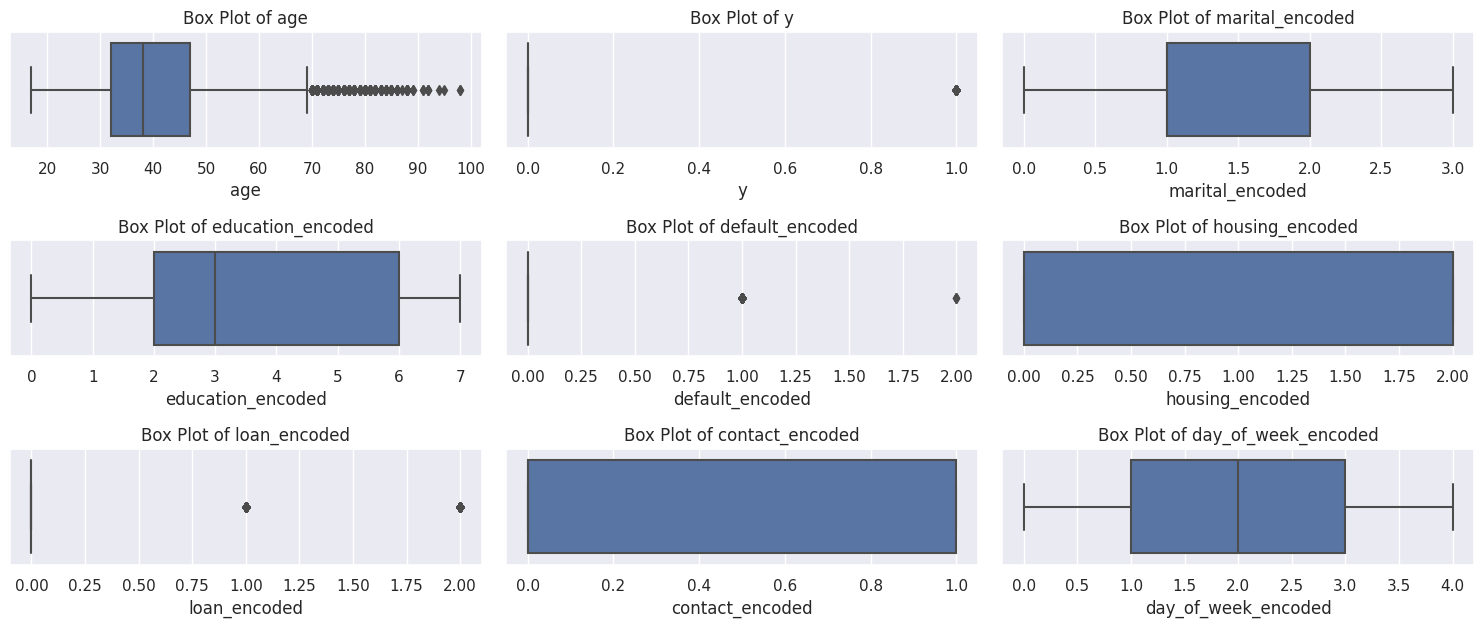

In [ ]:
# Select numerical columns where you want to check for outliers
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Create box plots for numerical columns
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data_encoded[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

**Scaling age column**

In [ ]:
# Extract the 'age' column for scaling
age_column = data_encoded[['age']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'age' column
scaled_age = scaler.fit_transform(age_column)

# Replace the original 'age' column with the scaled values
data_encoded['age_scaled'] = scaled_age

# Display the DataFrame with the scaled 'age' column
print(data_encoded[['age', 'age_scaled']].head())



   age  age_scaled
0   56    1.533034
1   57    1.628993
2   37   -0.290186
3   40   -0.002309
4   56    1.533034


In [ ]:
# Drop the original column
data_encoded.drop('age', axis=1, inplace=True)

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   y                    41188 non-null  int64  
 1   job_admin.           41188 non-null  uint8  
 2   job_blue-collar      41188 non-null  uint8  
 3   job_entrepreneur     41188 non-null  uint8  
 4   job_housemaid        41188 non-null  uint8  
 5   job_management       41188 non-null  uint8  
 6   job_retired          41188 non-null  uint8  
 7   job_self-employed    41188 non-null  uint8  
 8   job_services         41188 non-null  uint8  
 9   job_student          41188 non-null  uint8  
 10  job_technician       41188 non-null  uint8  
 11  job_unemployed       41188 non-null  uint8  
 12  job_unknown          41188 non-null  uint8  
 13  month_apr            41188 non-null  uint8  
 14  month_aug            41188 non-null  uint8  
 15  month_dec            41188 non-null 

#**Spliting Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded.drop('y',axis=1),
                                                    data_encoded['y'],
                                                    test_size=.25, random_state = 42,
                                                    stratify= data_encoded['y'])

#**Training and Evaluating the Model**

In [31]:
def printModelMetrics(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('Train set accuracy = ', metrics.accuracy_score(y_train, y_train_pred))
    print('Test set accuracy = ', metrics.accuracy_score(y_test, y_test_pred))
    print(metrics.classification_report(y_test, y_test_pred))

    cm = metrics.confusion_matrix(y_test, y_test_pred)
    cm = pd.DataFrame(cm, columns=['Predicted No Loan', 'Predicted Loan'], index=['Truth No Loan', 'Truth Loan'])
    sns.heatmap(cm, annot=True, fmt='g', cbar=False)
    plt.show()

    y_test_proba = model.predict_proba(X_test)
    y_test_proba = y_test_proba[:,1]
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # calculate scores
    ns_auc = metrics.roc_auc_score(y_test, ns_probs)
    lr_auc = metrics.roc_auc_score(y_test, y_test_proba)
    # summarize scores
    print('ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, y_test_proba)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Model Skill')

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

Train set accuracy =  0.9145058431258295
Test set accuracy =  0.8863746722346314
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9137
           1       0.48      0.13      0.21      1160

    accuracy                           0.89     10297
   macro avg       0.69      0.56      0.57     10297
weighted avg       0.85      0.89      0.86     10297



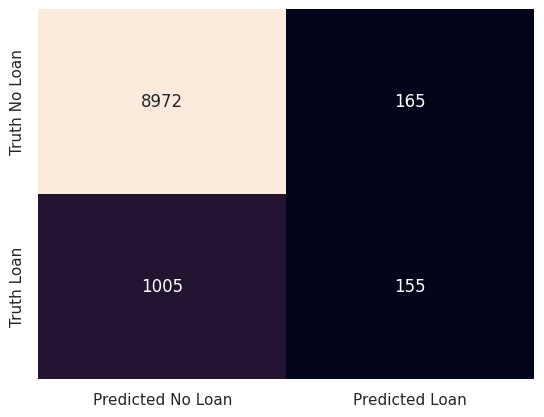

ROC AUC=0.664


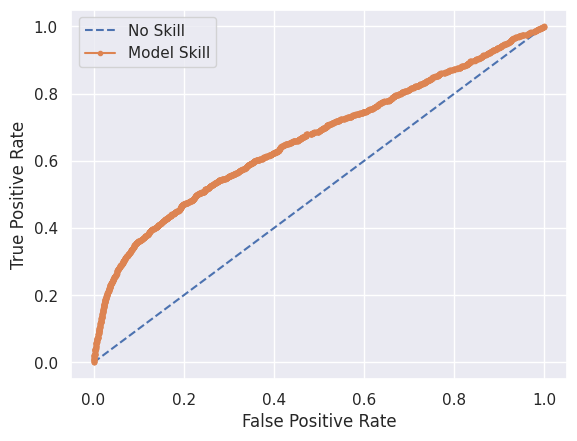

In [32]:
model = svm.SVC(gamma = 0.2, C=5, probability=True)
model.fit(X_train, y_train)
printModelMetrics(model, X_train, X_test, y_train, y_test)

# **Trying another models**

**Logistic Regression**

Pros: Simple, interpretable, and can provide probabilities.

Cons: Assumes a linear relationship between features and log-odds of the response.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train set accuracy =  0.8872163413291897
Test set accuracy =  0.8878314072059823
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      9137
           1       0.52      0.07      0.12      1160

    accuracy                           0.89     10297
   macro avg       0.70      0.53      0.53     10297
weighted avg       0.85      0.89      0.85     10297



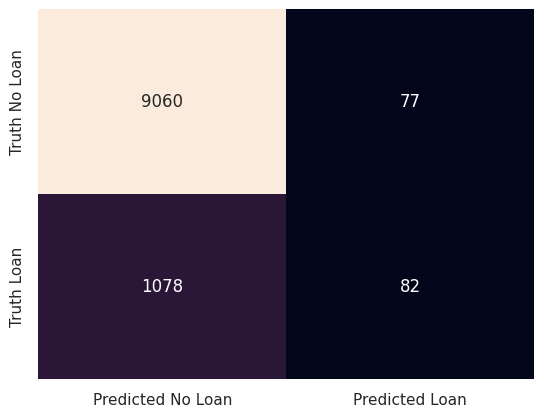

ROC AUC=0.748


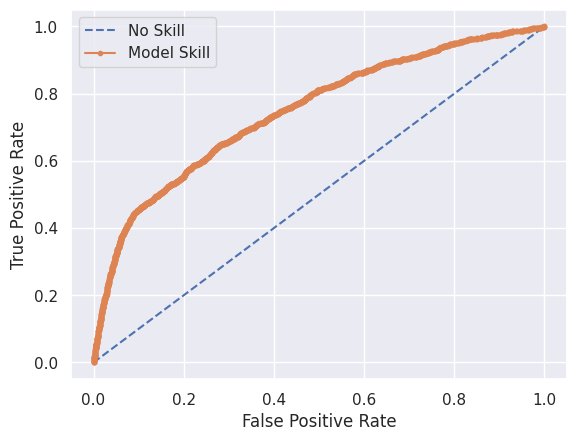

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)
printModelMetrics(model, X_train, X_test, y_train, y_test)

**Random Forest**

Pros: Robust, handles non-linearity well, less prone to overfitting.

Cons: Less interpretable than simpler models

Train set accuracy =  0.9782784629827458
Test set accuracy =  0.8743323298047975
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      9137
           1       0.39      0.19      0.26      1160

    accuracy                           0.87     10297
   macro avg       0.64      0.58      0.60     10297
weighted avg       0.85      0.87      0.86     10297



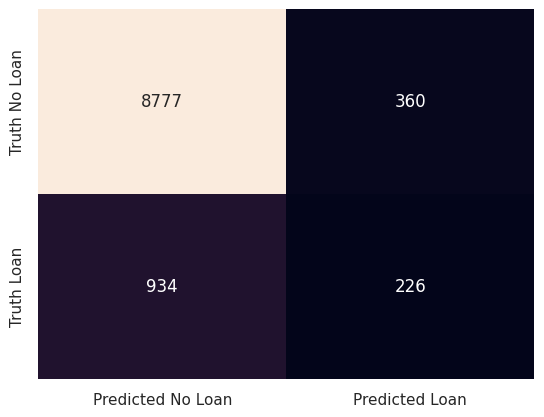

ROC AUC=0.725


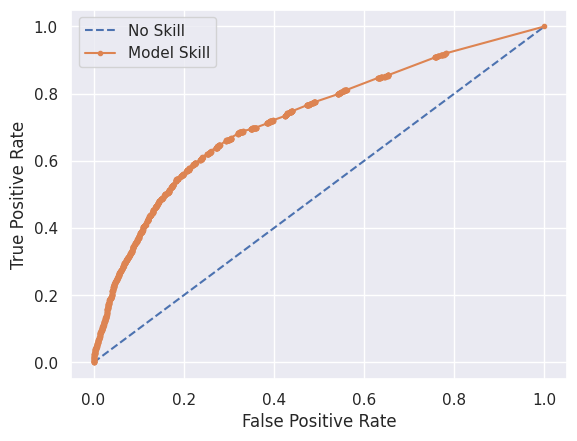

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
printModelMetrics(model, X_train, X_test, y_train, y_test)

**Gradient Boosting**

Pros: High accuracy, good for complex relationships.

Cons: Can be computationally expensive.

Train set accuracy =  0.8925577028908096
Test set accuracy =  0.8883169855297659
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9137
           1       0.52      0.09      0.16      1160

    accuracy                           0.89     10297
   macro avg       0.71      0.54      0.55     10297
weighted avg       0.85      0.89      0.85     10297



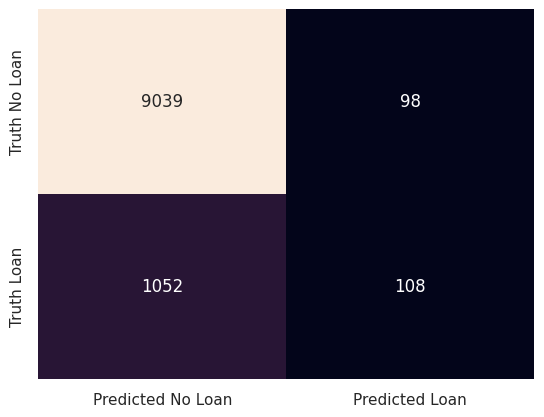

ROC AUC=0.765


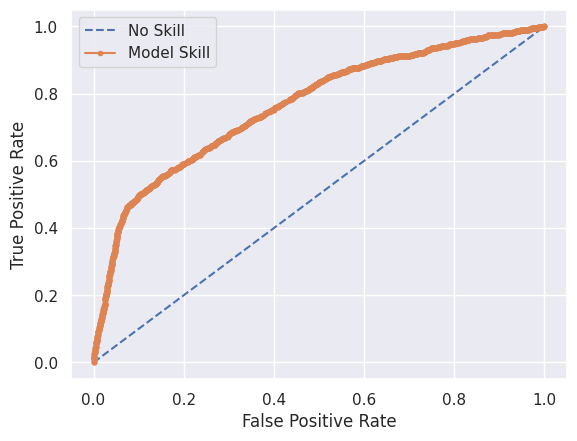

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
printModelMetrics(model, X_train, X_test, y_train, y_test)

**K-Nearest Neighbors (KNN)**

Pros: Simple, non-parametric, effective for small datasets.

Cons: Computationally expensive for large datasets.


Train set accuracy =  0.9006506749538701
Test set accuracy =  0.8818102359910653
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9137
           1       0.41      0.11      0.18      1160

    accuracy                           0.88     10297
   macro avg       0.65      0.55      0.56     10297
weighted avg       0.84      0.88      0.85     10297



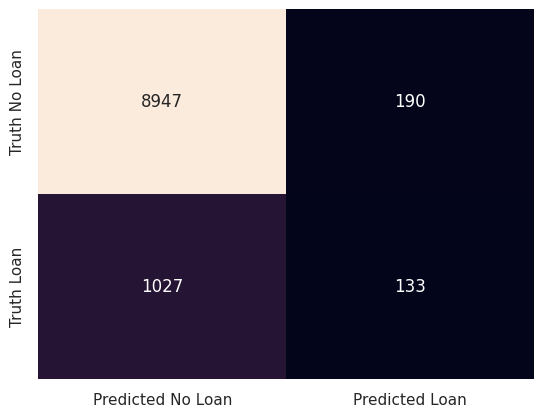

ROC AUC=0.658


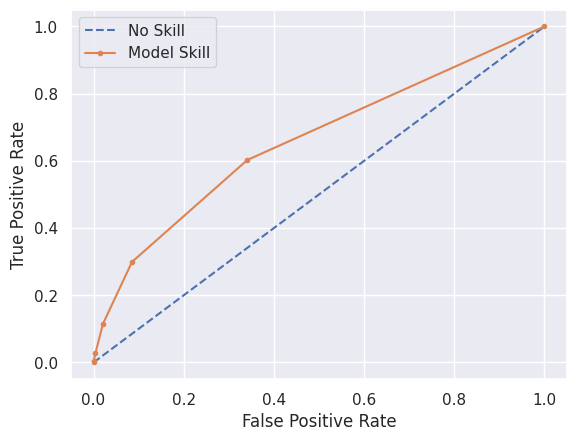

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
printModelMetrics(model, X_train, X_test, y_train, y_test)

Train set accuracy =  0.8600239551973067
Test set accuracy =  0.8608332524036127
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      9137
           1       0.36      0.31      0.34      1160

    accuracy                           0.86     10297
   macro avg       0.64      0.62      0.63     10297
weighted avg       0.85      0.86      0.86     10297



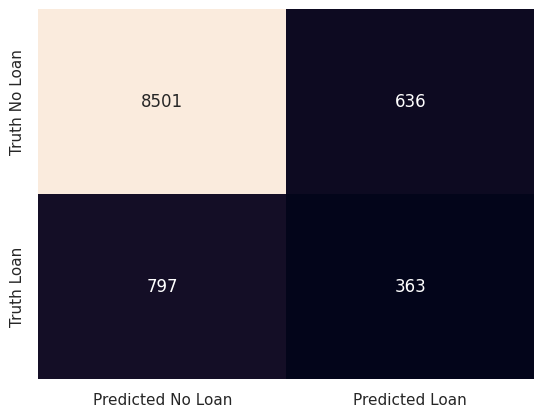

ROC AUC=0.721


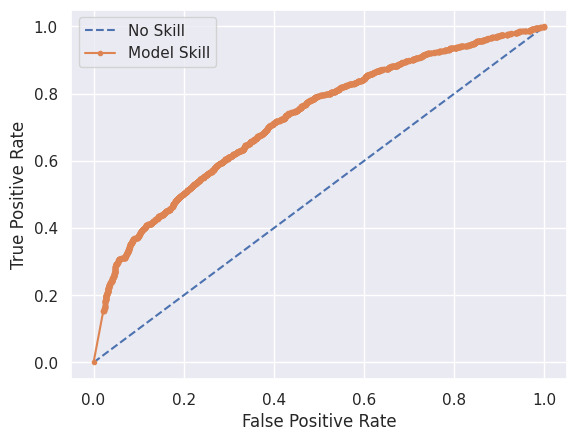

In [39]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
printModelMetrics(model, X_train, X_test, y_train, y_test)


**XGBoost**

Pros: High performance, handles missing data well.

Cons: Can be computationally expensive.


Train set accuracy =  0.9123369266129293
Test set accuracy =  0.8885112168592794
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9137
           1       0.52      0.16      0.25      1160

    accuracy                           0.89     10297
   macro avg       0.71      0.57      0.59     10297
weighted avg       0.86      0.89      0.86     10297



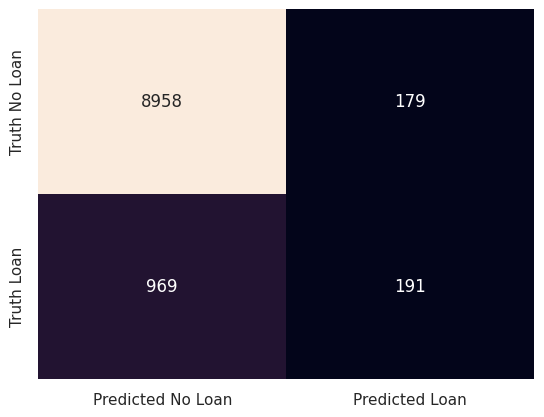

ROC AUC=0.752


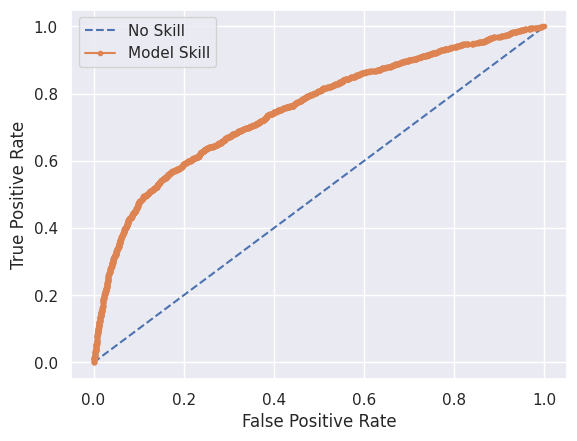

In [40]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
printModelMetrics(model, X_train, X_test, y_train, y_test)

# **Conclusion**

**Best Models**

--> XGBoost

--> Gradient Boosting

--> Logistic Regression

--> SVM

# **Future Improvments**

--> Spliting data to train , evaluation and test data.